<a href="https://colab.research.google.com/github/EndangSupriyadi/GCI_GLOBAL_2025/blob/master/lec5_2_notebook_appendix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4-2 Statistics and Probability (Appendix)

**Chapter Introduction**  

In the latter part of the course, you will learn how to think and calculate techniques using probability and statistics. We will explain probability and statistics, including mathematical formulas, which may be difficult for those who do not have a mathematical background. In that case, please make sure you have a rough grasp of the basic concepts and calculation features of each.

By assuming that various phenomena in the world occur probabilistically, we can express those phenomena in mathematical terms. Specifically, you will learn about random variables and probability distributions, as well as the law of large numbers and the central limit theorem, which are said to be the three essentail tools of probability theory. Incidentally, the third is the large deviation principle, which is used to handle very rare cases that are unlikely to occur probabilistically and to describe the behavior of areas with large deviations, but since this is far beyond the scope of this book, we will omit it. In addition, statistical estimation and testing will also be covered.

Machine learning, which will appear in this course in the future, is based on these concepts of probability theory and statistics. If you have not yet learned the basics of probability and statistics, you will learn them well, using references as well.

Goal: To have a basic understanding of probability and statistics and be able to perform calculations

## Table of contents

- **4-2.6 Preparation to Learn Probability and Statistics**
    - 4-2.6.1 Prior Knowledge for This Chapter
    - 4-2.6.2 Importing Libraries

- **4-2.7 Probability**
    - 4-2.7.1 Mathematical Probability
    - 4-2.7.2 Statistical Probability
    - 4-2.7.3 Conditional Probability and Chain Rule
    - 4-2.7.4 Independence and Subservience
    - 4-2.7.5 Bayes's Theorem

- **4-2.8 Random Variables and Probability Distributions**
    - 4-2.8.1 Stochastic Variable, Probability Function, Distribution Function, Expected Value
    - 4-2.8.2 Various Distribution Functions
    - 4-2.8.3 Kernel Density Function

- **4-2.9 (Application) Multidimensional Probability Distribution**
    - 4-2.9.1 Simultaneous and Peripheral Probability Functions
    - 4-2.9.2 Conditional Probability Functions and Conditional Expectations
    - 4-2.9.3 Definition of Independence and Continuous Distribution

- **4-2.10 Estimation Statistics**
    - 4-2.10.1 Law of Large Numbers
    - 4-2.10.2 Central Limit Theorem
    - 4-2.10.3 Sample Distribution
- **4-2.11 Statistical Estimation**
    - 4-2.11.1 Estimator and Point Estimator
    - 4-2.11.2 Unbiasedness and Consistency
    - 4-2.11.3 Interval Estimation
    - 4-2.11.4 Find the Estimated Quantity

- **4-2.12 Statistical Test**
    - 4-2.12.1 Test
    - 4-2.12.2 Type 1 and Type 2 Errors
    - 4-2.12.3 Cautionary Note on Tests for Big Data

- **4-2.13 Comprehensive question**
    - Comprehensive Question4-2-3 Test

***

## 4-2.6 Preparation for Learning Probability and Statistics.
Keywords: numpy, Scipy, Pandas, Matplotlib, random seed

In this chapter, you will learn about probability and statistics. First, we will explain some concepts, and then we will get into theory.


### 4-2.6.1 Prior Knowledge for This Chapter
There are more mathematical formulae and it may be a little difficult to get to grips with at first, but you should gradually get used to it. As a reference for beginners, the references ‘A-5’ and the reference URL ‘B-10’ are listed at the end of the book. If you study these, you will have a better understanding of the basics of probability and statistics.

In the following sections, the explanation will proceed on the assumption that you have already seen these fundamentals.

### 4-2.6.2 Importing libraries used in this chapter
In this chapter, we will use various libraries previously. We will proceed below assuming that you have imported the following.

In the last line of the following program, the random seed (the value used as the basis for generating random numbers) is set to 0 by writing “`np.random.seed(0)`”. Therefore, since the series of random numbers generated is set to 0, there is no difference in the series of random numbers obtained depending on the environment of the computer, etc., and the same random numbers will be generated.

In [ ]:
# The following libraries are used, so please load them beforehand
import numpy as np
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

# Visualization Library
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# Displayed to 3 decimal places
%precision 3

# Fixing random seed
np.random.seed(0)

## 4-2.7 Probability
Keywords: probability, trial, root event, sample space, event, conditional probability, Bayes' theorem, prior probability, posterior probability

First, we will learn about probability.

### 4-2.7.1 Mathematical Probability

To begin, we will use the subject of dice to explain some of the terms and concepts needed to study probability.

The possible states of a dice are numbers from 1 to 6. So we will define the dice data as a Numpy array object as follows

In [ ]:
# Stores the possible values of the dice in an array
dice_data = np.array([1, 2, 3, 4, 5, 6])

#### Event
We consider extracting only one random item from this data. This is called a **trial**: in Numpy, if you specify “1” as the second value of `random.choice`, you can extract one random item (by the way, if you specify “2”, you can extract two). This is equivalent to rolling a dice once to see what the result will be.

In [ ]:
# argument means to extract one at random from the target data dice_data
print('Only one randomly extracted:', np.random.choice(dice_data, 1))

Only one randomly extracted: [5]


In the above result, “5” is extracted, but it could be “1”, “3”, or any other value since a different value is extracted on each run. The result of each of these trials is called the **element event (atomic event)**. The set of all possible root events is called the **sample space (denoted by $S$ below)**, and any subset of the sample space is called an **event**. For example, there could be an event $X$ that produces 5 as described earlier, or an even number of events $Y$ such as the following.

\begin{eqnarray}
S=\{1, 2, 3, 4, 5, 6\}
\end{eqnarray}

\begin{eqnarray}
X=\{5\}
\end{eqnarray}

\begin{eqnarray}
Y=\{2, 4, 6\}
\end{eqnarray}

Next we will use these concepts to learn about probability. As for probability, its axioms (not strict, but think of them as assumptions) are as follows. However, it may be difficult to understand for those who see it for the first time, so it is okay to understand probability as $P(X)$ = the number of cases in which event $X$ occurs/the number of all possible cases.

>If we write $P(E)$ as the probability of an event $E(Event)$ occurring, the following axioms must be satisfied.
>
> Axiom 1: For any event $E $0≤P(E)≤1$

> Axiom 2: $ P(S)=1$ (Supplement: this means that the probability of all events is 1.)
>
> Axiom 3: If $A∩B=\emptyset$, then $P(A∪B) = P(A) + P(B)$

Another event is the empty set $\emptyset$, which is called an **empty event**. An empty event is a set that has no elements at all. For example, with dice, a 7 is not possible with ordinary dice, so this is an empty event and its probability is 0.

#### Complementary event

The set of outcomes that do not belong to an event $E$ is called the **complementary event**. This is also called the **complement** of $E$ and is expressed using c (complement) as follows. For example, when

\begin{eqnarray}
E = \{2, 4, 6\}
\end{eqnarray}

complementary event will be

\begin{eqnarray}
E^c=\{1, 3, 5\}
\end{eqnarray}

#### Intersection and Unions of Event

$A∩B$ is a Intersection of events, which refers to an event common to two events. Specifically,

\begin{eqnarray}
A=\{1, 2, 3\}
\end{eqnarray}

\begin{eqnarray}
B=\{1, 3, 4, 5\}
\end{eqnarray}

since the numbers in common are 1 and 3 when considering the two sets,

\begin{eqnarray}
A \cap B=\{1, 3\}
\end{eqnarray}

The $A∪B$ is a summation event, which refers to the sum of two events. Considering the same $A$ and $B$ as above, we have

\begin{eqnarray}
A \cup B=\{1, 2, 3, 4, 5\}
\end{eqnarray}

#### Calculating probabilities

We have seen the “event $X$ with 5”, the “empty event”, the Intersection of events of $A$ and $B$”, and the “Union of event of $A$ and $B$”, and the probability of these events occurring can be calculated as follows.

\begin{eqnarray}
P(X)=\frac{1}{6}
\end{eqnarray}

\begin{eqnarray}
P(\emptyset)= 0
\end{eqnarray}

\begin{eqnarray}
P(A \cap B)=\frac{1}{3}
\end{eqnarray}

\begin{eqnarray}
P(A \cup B)=\frac{5}{6}
\end{eqnarray}

The approach calculated here is sometimes called mathematical probability.

To understand mathematical probability, we start with set and topological theory, Lebesgue integral theory, etc. However, mathematics is more difficult the more basic the theory becomes, so we will not discuss it here. Those who are going to become researchers, for example, should read the reference “A-9” at the end of the book.

### 4-2.7.2 Statistical Probability

Next, let's run an experimental simulation of rolling the dice 1000 times. Let us calculate whether each root event (each event that yields 1-6) actually occurs with a mathematical probability of 1/6.

The probability of an event occurring is calculated by dividing the number of trials (in this example, 1000 trials) by the number of times the value actually occurred. The total number of trial results that contain a value i can be found as `len(dice_roless[dice_rolls==i])`.

In [ ]:
# Roll the dice a thousand times
calc_steps = 1000

# 1,000 extractions of data from 1-6
dice_rolls = np.random.choice(dice_data, calc_steps)

# Calculate how much of each number was extracted
for i in range(1, 7):
    p = len(dice_rolls[dice_rolls==i]) / calc_steps
    print(i, 'probability', p)

1 probability 0.171
2 probability 0.158
3 probability 0.157
4 probability 0.183
5 probability 0.16
6 probability 0.171


The results show that the probability of each of the eyes 1-6 is close to $1/6$ (≈0.166). This is called **statistical probability**. We will learn more about this phenomenon later.

### 4-2.7.3 Conditional Probability and the Chain Rule
Next, let's learn about conditional probability and independence. The probability of event $B$ occurring under the conditions under which event $A$ occurred is called the conditional probability of $B$ given $A$,

\begin{eqnarray}
P(B|A) = \frac{P(A \cap B) }{P(A)}
\end{eqnarray}

(when $P(A) >0$). This expression can be further transformed into the following equation, which is called the **Chain Rule**.

\begin{eqnarray}
P(A \cap B) = P(B|A)P(A)
\end{eqnarray}

Conditional probabilities can be thought of as probabilities based on background information.

For example, suppose you roll the dice once and forget what the number is, but remember that it is an even number. In this case, let us try to find the probability that the number is greater than or equal to 4. Let us assume that the condition of being an even number is

\begin{eqnarray}
A=\{2, 4, 6\}
\end{eqnarray}

and events where the number is 4 or more are considered to be

\begin{eqnarray}
B=\{4, 5, 6\}
\end{eqnarray}

The Intersection of events when both conditions are satisfied is

\begin{eqnarray}
A \cap B=\{4, 6\}
\end{eqnarray}

Therefore, from the definition of conditional probability above, the probability we seek is

\begin{eqnarray}
P(B|A) = \frac{P(A \cap B) }{P(A)}
       = \frac{\frac{2}{6}}{\frac{3}{6}}
       = \frac{2}{3}
\end{eqnarray}

### 4-2.7.4 Independence and Dependence
Events $A$ and $B$ are independent of each other if the conditional probabilities and the probabilities of each event are the same, as follows.

\begin{eqnarray}
P(A|B) = P(A)
\end{eqnarray}

It can also be assumed that the event B has no effect on the Here, from the above conditional probability (which is an equation where A and B are interchanged), the following holds.

\begin{eqnarray}
P(A \cap B) = P(A)P(B)
\end{eqnarray}

If this equation does not hold, we say that events $A$ and $B$ are dependent on each other. If we consider the circumstance $A$ that there will be an even number and the event $B$ that there will be more than 4, which we have just mentioned, they are not equal because they are less than or equal. Therefore, event $A$ and circumstance $B$ are not independent, but dependent on each other.

\begin{eqnarray}
P(A \cap B)= \frac{2}{6}= \frac{1}{3}
\end{eqnarray}

\begin{eqnarray}
P(A)P(B)= \frac{3}{6}\cdot\frac{3}{6}=\frac{1}{4}
\end{eqnarray}

### 4-2.7.5 Bayes' Theorem

Finally, let us discuss Bayes' theorem. We have just considered conditional probability. If $A$ is the outcome event and $B$ is its cause event, we obtain the following **Bayes' Theorem**. This is to find the probability that the cause is a $B$ event when the outcome $A$ is known. Note that $B^c$ is the complement of B, which is the set that is not B.

\begin{eqnarray}
P(B|A) = \frac{P(A|B)P(B) }{P(A|B)P(B) + P(A|B^c)P(B^c)}
\end{eqnarray}

In this case, $P(B)$ is the probability of event B before event A occurs (this is called the **prior probability**), $P(B|A)$ is the probability of event B after event A occurs (this is called the **posterior probability**), and $P(A|B)$ is the probability of observing A under the cause B (this is called the **likelihood**) (this is called the **likelihood**).

The following is a discrete version of the general Bayes Theorem. Here we considered an event $B$ with a single cause, but there can be multiple causes leading to an outcome, such as $B_1$, $B_2$, .... In such a case, the following equation is an extension for each event of each cause ($B_j$ is the one whose sum set is the whole event in exclusion).

\begin{eqnarray}
P(B_i|A) = \frac{P(A|B_i)P(B_i) }{\sum_{j = 1}^k P(A|B_j)P(B_j)}
\end{eqnarray}

Bayes' theorem is used in various parts of practice. For example, it is often used to determine junk mail. Note that in Bayesian theory, causes may be continuous values rather than discrete values. This is the continuous value version of Bayes Theorem. If you are interested, please check it out.

#### <Pratice Question 4-2-8>

Prepare an array representing the heads of a coin as 0 and the tails of a coin as 1 as follows.
`coin_data = np.array([0,1])`

Using this array, perform 1,000 coin tosses and determine the probability of obtaining a “Heads” (value of 0) and a “Tails” (value of 1).

#### <Pratice Question 4-2-9>

Consider a lottery problem: Suppose there are 100 winners out of 1,000 lots. Let $A$ and $B$ draw lots in order, and find the probability that both $A$ and $B$ win. However, each draws the lottery only once, without returning the raffle ticket (this can be done by hand calculation).

#### <Pratice Question 4-2-10>
Suppose the percentage of people in Japan who have a certain disease ($X$) is 0.1%. The following is what is known about the test method for detecting $X$.

- When a person with the disease undergoes the
test, 99% of them show a positive reaction (a reaction indicating that the person is sick).

- When a person who does not have the disease takes the test, 3% will test positive (false positive).

A person living in Japan takes the test and tests positive. What is the probability that this person has the disease $X$? (This can be calculated by hand).

***

## 4-2.8 Random Variables and Probability Distributions
Keywords: random variable, probability function, probability density function, expectation, uniform distribution, Bernoulli distribution, binomial distribution, normal distribution, Poisson distribution, lognormal distribution, kernel density estimation

Next, let's learn about random variables and probability distributions.

### 4-2.8.1 Random variable, Probability function, Distribution function, Expected value

A **random variable** is a variable to which a probability is assigned for possible values.

In the example of dice, the possible values of a variable are the numbers 1 through 6, and if there is no razor in the dice, each value is assigned an equal probability of 1/6. Thus, when a variable takes a value probabilistically, the variable is called a random variable, and the possible values that the random variable can take are called **realization**. In the dice example, the realized values are [1, 2, 3, 4, 5, 6]. When the realizations are countable, we say they are **discrete random variables**, and when they are not, we say they are **continuous random variables**.


Countable means that it is not continuous and takes values in jumps, which can be finite, like [1, 2, 3, 4, 5, 6] on a dice, or it can be infinite.

The table is as follows (upper case $X$ refers to the random variable and lower case $x$ refers to its realization).

|$X$|1|2|3|4|5|6|
|:--:|:--:|:--:|:--:|:--:|:--:|:--:|
|$P(X)$|$\frac{1}{6}$|$\frac{1}{6}$|$\frac{1}{6}$|$\frac{1}{6}$|$\frac{1}{6}$|$\frac{1}{6}$|

#### Probability Functions

A function that describes all possible values a random variable can take and the probability of that value occurring is called a **probability function**, and the formula is as follows

\begin{eqnarray}
p(1)= \frac{1}{6}, \ p(2)= \frac{1}{6}, \ p(3)= \frac{1}{6}, \ p(4)= \frac{1}{6}, \ p(5)= \frac{1}{6}, \ p(6)= \frac{1}{6}
\end{eqnarray}

Suppose, however, that the following holds Note that the lowercase $x$ refers to the actual value (realized value) taken by the random variable.

\begin{eqnarray}
\sum^6_{i=1}p(x_i)=1
\end{eqnarray}

#### Distribution Function

The **distribution function (cumulative probability distribution function)** is the probability that the random variable $X$ is less than or equal to a real number $X$. When it is a discrete random variable, it is defined as $F(X)$ as follows

\begin{eqnarray}
F(X)=P(X \le x)=\sum_{x_{i} \le x}p(x_i)
\end{eqnarray}

When the variable is a continuous random variable, the derivative of the distribution function is called the **density function (probability density function)** and is defined as follows (when $-\infty < x < \infty$)

\begin{eqnarray}
f(x) = \frac{dF(x)}{dx}
\end{eqnarray}

#### Expected value

Note that the expected value is not strictly the same as the average as we learned in Chapter 3. As a short introduction, the law of large numbers makes the average value approach the expected value. If the random variable is $X$, the defining formula for the expected value $E(X)$ is as follows.

\begin{eqnarray}
E(X)=\sum_{x}xf(x)
\end{eqnarray}

In the above, the dice rolls took values from 1 to 6, each with a probability of 1/6, so their expected value is $1*1/6+2*1/6+・・・・6*1/6=3.5$.

### 4-2.8.2 Various Distribution Functions

Below are some commonly used distribution functions. Only simple Python implementations will be looked at here. For detailed formulas and surrounding knowledge (variance, expected value, mean), please refer to the references already explained or the reference URL “B-10”.

#### Uniform Distribution
As in the dice example above, a distribution in which all events have equal probability of occurring is called a uniform distribution, and can be graphed as follows

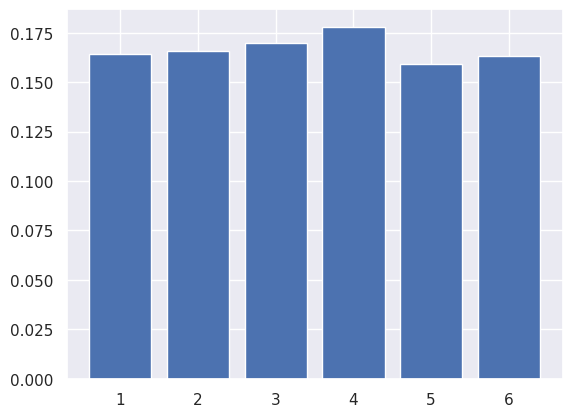

In [ ]:
# Uniform distribution
# Roll the dice 1000 times
calc_steps = 1000

# 1,000 extractions of data from 1-6
dice_rolls = np.random.choice(dice_data, calc_steps)

# Calculate how much of each number was extracted
prob_data = np.array([])
for i in range(1, 7):
    p = len(dice_rolls[dice_rolls==i]) / calc_steps
    prob_data = np.append(prob_data, len(dice_rolls[dice_rolls==i]) / calc_steps)

plt.bar(dice_data, prob_data)
plt.grid(True)

#### Bernoulli Distribution

A trial with only two outcomes is called a Bernoulli trial. The Bernoulli distribution refers to the distribution of the probability of each event occurring in one Bernoulli trial.

The following shows the probability distribution of tossing a coin eight times, assuming that the outcome is [0, 0, 0, 0, 0, 0, 0, 1, 1, 1], with “0” for a heads-up and “1” for a tails-up.

In [ ]:
# Bernoulli distribution
# Consider 0:head (front) and 1:tail (back)
# Set the number of samples as 8
prob_be_data = np.array([])
coin_data = np.array([0, 0, 0, 0, 0, 1, 1, 1])

# Extract unique and unique values (in this case, 0 and 1)
for i in np.unique(coin_data):
    p = len(coin_data[coin_data==i]) / len(coin_data)
    print('probability of having', i, p)
    prob_be_data = np.append(prob_be_data, p)

probability of having 0 0.625
probability of having 1 0.375


Graphing is as follows. Note that the labels are set with `xticks`.

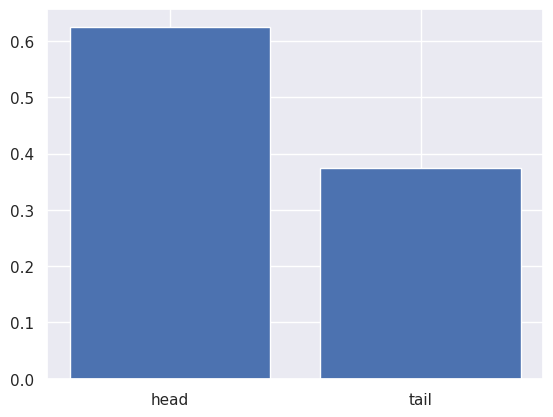

In [ ]:
plt.bar([0, 1], prob_be_data, align='center')
plt.xticks([0, 1], ['head', 'tail'])
plt.grid(True)

#### Getting Data Based on Distributions in Python

In the examples of the uniform and Bernoulli distributions we have discussed so far, we have taken real data and graphed its distribution. However, when analyzing data, you may want to create a sequence of data based on a specific distribution using a formula. For example, you may want to compare a graph of the distribution of real data with a graph of a distribution obtained from a calculation to see if it resembles or approximates a particular property.
In such cases, you can use various functions of Numpy to perform the calculation. Below, we will see what characteristics can be obtained by creating and graphing distribution data using those functions.

#### Binomial Distribution

The binomial distribution is the number of independent Bernoulli trials repeated n times, which can be computed in python using `random.binominal`. The parameters passed to `binominal` are, from the beginning, the number of trials (`n`), the probability (`p`), and the number of samples. The `random.binominal` returns the number of times out of `n` trials that an event occurs with probability `p`.

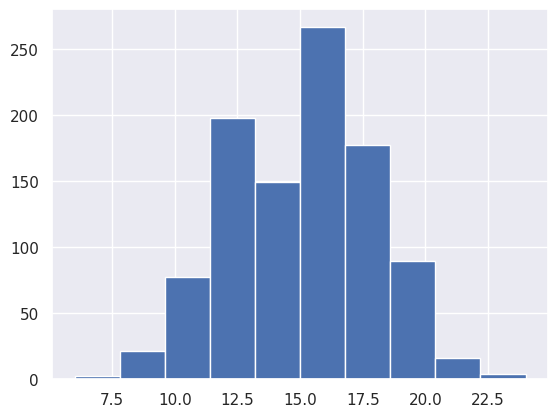

In [ ]:
# Binominal Distribution
np.random.seed(0)
x = np.random.binomial(30, 0.5, 1000)
plt.hist(x)
plt.grid(True)

#### Poisson Distribution

The Poisson distribution is used when the probability of a rare event occurring. It is a distribution that occurs at a certain rate for a certain time or area. For example, the number of raindrops per unit area or the number of trees growing per square meter follow the Poisson distribution.

The first parameter is the number of times the event is expected to occur in that interval, here set to 7. The second parameter is the number of samples.

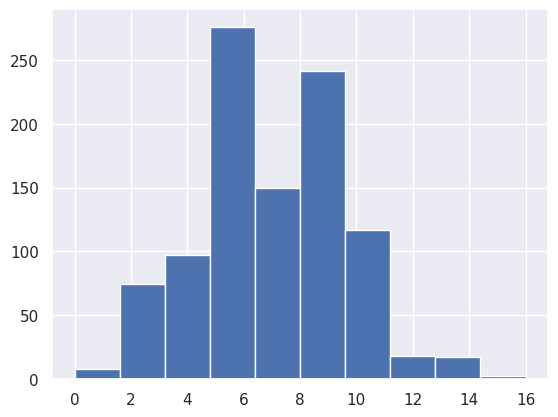

In [ ]:
# Poisson Distribution
x = np.random.poisson(7, 1000)
plt.hist(x)
plt.grid(True)

#### Normal and Log-normal Distributions

Next, let's look at the normal distribution and the lognormal distribution. The normal distribution, also called Gaussian distribution, is a typical continuous probability distribution. It can be seen as a variety of phenomena in our daily lives. The log-normal distribution is the distribution when $\log{x}$ follows a normal distribution. It can be obtained by using `np.random.normal` and `np.random.lognormal`, respectively.

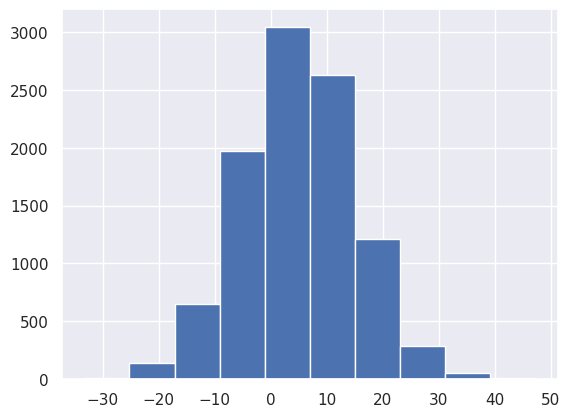

In [ ]:
# Normal Distribution
# np.random.normal(Average, Standard deviation, sample number)
x = np.random.normal(5, 10, 10000)
plt.hist(x)
plt.grid(True)

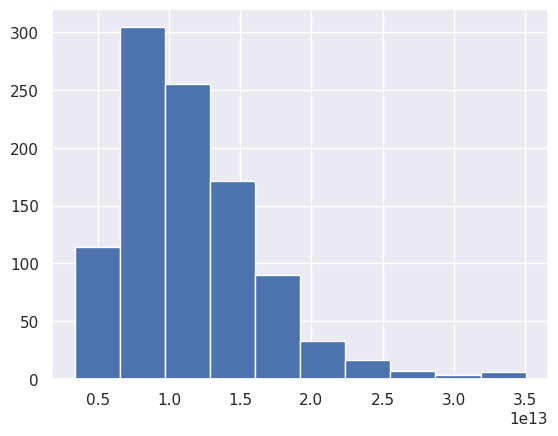

In [ ]:
# log-normal distribution
x = np.random.lognormal(30, 0.4, 1000)
plt.hist(x)
plt.grid(True)

### 4-2.8.3 Kernel Density Function

Next, let's look at the kernel density function. This is an estimate of the density function using given data.
Let's approximate the distribution for the student absences data that we dealt with previously. The number of absences is given in `absences`, so we will use this data. That is, if we read the data as `student_data_math`, then `student_data_math.absences` corresponds to the number of absences.

The following is an estimate of the distribution of the number of absences using the kernel density function. Note, however, that due to the nature of the data, it cannot be less than 0, so be careful when using it in practice. A graph of the kernel density function can be drawn by specifying `kind='kde'` as follows.

`student_data_math.absences.plot(kind='kde', style='k--')`

In [ ]:
# Note: You do not need to run this section if you have acquired the data.
import requests
import zipfile
from io import StringIO
import io

zip_file_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip'

r = requests.get(zip_file_url, stream=True)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

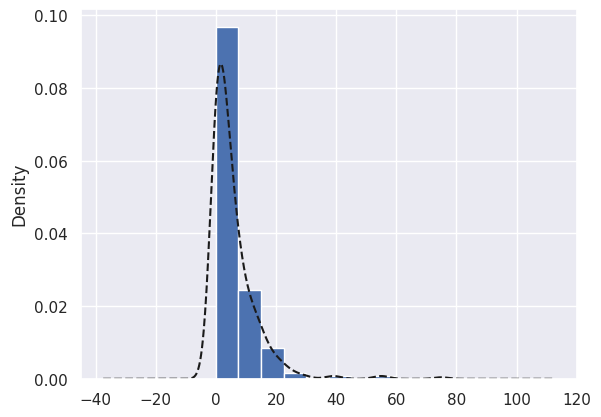

In [ ]:
# Read data
student_data_math = pd.read_csv('student-mat.csv', sep=';')

# Kernel density function
student_data_math.absences.plot(kind='kde', style='k--')

# Simple histogram, with density=True, displayed with probability
student_data_math.absences.hist(density=True)
plt.grid(True)

In [ ]:
?plt.hist

A histogram based on the `abcences` in this time's student-mat.csv is drawn above. The dotted line in the graph is the kernel density function created above, which is smoothly curved. By looking at this, we can guess what kind of distribution this data was generated from.

#### <Practice Question 4-2-11>

Draw a sample distribution (histogram) with sample mean $\overline{X}=\frac{1}{n}\sum^n_{i=1}X_i$ after 10000 iterations of $n=100$ sampling from a normal distribution with mean 0 and variance 1.

#### <Pratice Question 4-2-12>

Implement the case of a lognormal distribution.

#### <Practice Question 4-2-13>

Using the data used in the first half of the section, draw a histogram and kernel density estimate for the first term math grade G1 of the student's data.

***

## 4-2.9  (Application) Multidimensional probability distribution
Keywords: simultaneous probability distribution, marginal probability function, conditional probability function, conditional mean, variance-covariance matrix, multidimensional normal distribution

So far, we have dealt with the case of only one random variable. Next, we will consider probability distributions when there are two or more random variables. Note that this is a bit of an applied area, and if it is difficult, you can skip over it without significant impact on later chapters. There are no pratice question in this section.

### 4-2.9.1 Simultaneous and peripheral probability functions
If $X$ is {$x_0, x_1, ... $} and $Y$ takes values on {$y_0, y_1, ... $}, we consider a discrete type random variable that takes values on {$y_0, y_1, ...$}. Suppose the probabilities that $X=x_i$ and $Y=y_j$ are written as follows.

\begin{eqnarray}
P(X=x_i, Y=y_j) = p_{X, Y}(x_i, y_j)
\end{eqnarray}

This is called the **joint probability function** and also called the **marginal probability function** of $X$ and is defined similarly for $Y$.

\begin{eqnarray}
p_{X}(x_i) = \sum^\infty_{j=0}p_{X, Y}(x_i, y_j)
\end{eqnarray}

### 4-2.9.2 Conditional Probability Functions and Conditional Expectations
For the conditional probabilities defined in the one-variable case, let us consider the two-variable case. We define the **conditional probability function** of $Y=y_j$ given $X=x_i$ as follows

\begin{eqnarray}
p_{Y|X}(y_j|x_i) = P(Y=y_j|X=x_i) =  \frac{p_{X, Y}(x_i, y_j)}{p_X(x_i)}
\end{eqnarray}

Also, with respect to this conditional probability function, the expected value is the conditional expectation, and the **conditional expectation (conditional mean)** of $Y$ given $X=x_i$ is

\begin{eqnarray}
E[Y|X=x_i] = \sum^\infty_{j=1}y_jp_{Y|X}(y_j|x_i) = \frac{\sum^\infty_{j=1}y_jp_{X, Y}(x_i, y_j)}{p_X(x_i)}
\end{eqnarray}

is defined above.

### 4-2.9.3 Definition of independence and continuous distribution
The definition of independence in two variables is independence when for all $x_i$ and $y_j$, the following holds

\begin{eqnarray}
p_{X, Y}(x_i, y_j) = p_{X}(x_i) p_{Y}(y_j)
\end{eqnarray}

Continuous distributions can also be defined as simultaneous probability density functions, marginal probability density functions, conditional probability density functions, independent, etc., as well as distributions of three or more random variables. Furthermore, there are multivariate normal distributions and variance-covariance matrices used in them, etc. Please study these concepts using reference materials.

#### Displaying a 2-D Normal Distribution Graphically

For reference, let's display a two-dimensional normal distribution below to get an idea of this multi-dimensional simultaneous probability density function.

The following will load the necessary libraries.

In [ ]:
# Load the necessary libraries
import scipy.stats as st
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# Data Setting
x, y = np.mgrid[10:100:2, 10:100:2]

pos = np.empty(x.shape + (2, ))

pos[:, :, 0] = x
pos[:, :, 1] = y

The $x$ and $y$ data above are created from 10 to 100, two numbers at a time, and grouped together as `pos` (the data are chopped finely by x and y to visualize the multi-dimensional normal distribution to be generated next, and the separators and other numbers have no particular meaning).

The next step is to generate data that follows a two-dimensional normal distribution. The `multivariate_normal` is set to the respective mean and variance-covariance matrices.

In [ ]:
# Multidimensional normal distribution
# Set the mean and variance-covariance matrix for each variable
# In the following example, the means of x and y are 50 and 50, respectively, and [[100, 0], [0, 100]] are the x and y covariance matrices
rv = multivariate_normal([50, 50], [[100, 0], [0, 100]])

# Probability density function
z = rv.pdf(pos)

The above is graphed as follows. Note that `plot_wireframe` of Axes3D is used for 3D graph.

In [ ]:
import matplotlib.pyplot as plt

<Axes3D: xlabel='x', ylabel='y', zlabel='f(x, y)'>

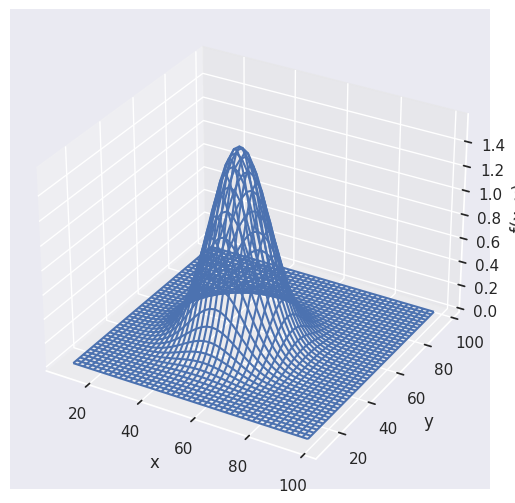

In [ ]:
fig = plt.figure(dpi=100)

ax = Axes3D(fig)
ax.plot_wireframe(x, y, z)

# set x-axis, y-axis, z-axis label
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')

# Change display scale unit of z-axis, sci means exponential, axis is specified by axis, scilimits=(n,m) means anything outside of n to m is in exponential notation
# scilimits=(0,0) means all are exponential
ax.ticklabel_format(style='sci', axis='z', scilimits=(0, 0))

# Add the axes set above to figure
fig.add_axes(ax)

***

## 4-2.10 Inferential Statistics
Keywords: sample, population, sampling, inferential statistics, sample size, law of large numbers, central limit theorem, t distribution, chi-square distribution, F distribution

So far, we have obtained the mean, standard deviation, etc. for the actual data obtained. This data we have obtained is called a **sample**. However, it is essentially important to know the nature of the larger data/whole behind it. The entire subject we are trying to infer by conducting statistical analysis based on this sample is called the **population**, and this is **inferential statistics**. The sample is also taken from the population, and this is called **extraction**. In fact, the observed data $X_1, , , X_n$ are realizations of $n$ random variables $X_1, , , X_n$, and this n is called the **size (magnitude)** of the sample. Also, a constant that represents a characteristic of the population, such as the mean (population mean) or variance (population variance) of the population, is called the **population**.

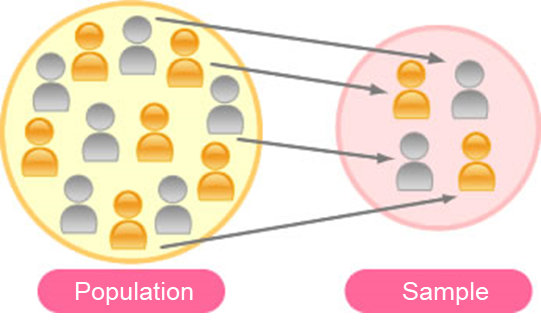

ReferenceURL: http://www.toukei.metro.tokyo.jp/manabou/img/tyuu/sirou/tokutyou/m-1.jpg

### 4-2.10.1 Law of Large Numbers

Next, we will learn about the **Law of Large Numbers**, an important aspect of probability theory. Let us again consider the previous example of throwing dice to see what comes out.

We will roll the dice more and more, and follow the trail of averages up to that point. Specifically, if the first throw results in a 1, the average is 1; if the next throw results in a 3, $(1+3)/2$, the average is 2, and so on. The law of large numbers states that as the number of trials is repeated (i.e., the number of trials N is increased), the average approaches the expected value (3.5).

In the following, the number of dice throws $N$ is set to 1000 and it is performed 4 times (4 passes). The result graph below shows that the larger $N$ is in any pass, the closer it gets to 3.5.

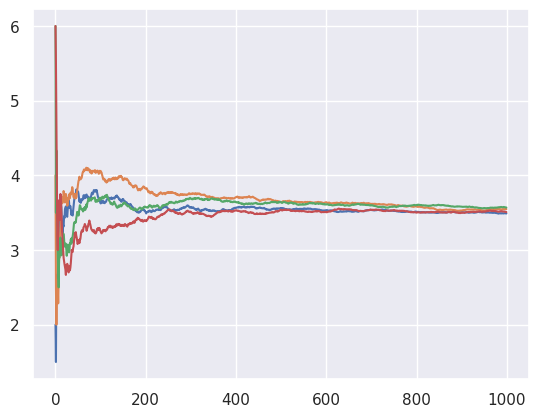

In [ ]:
# Law of Large Numbers

# Calculation times
calc_times =1000
# Dice
sample_array = np.array([1, 2, 3, 4, 5, 6])
number_cnt = np.arange(1, calc_times + 1)

# Generate 4 paths
for i in range(4):
    p = np.random.choice(sample_array, calc_times).cumsum()
    plt.plot(p / number_cnt)

### 4-2.10.2 Central Limit Theorem

Next is the Central Limit Theorem. This is the law that the more $N$ dice are thrown, the more the sample mean takes the form of a normal distribution.

In [ ]:
# Central Limit Theorem
def function_central_theory(N):

    sample_array = np.array([1, 2, 3, 4, 5, 6])
    numaber_cnt = np.arange(1, N + 1) * 1.0

    mean_array = np.array([])

    for i in range(1000):
        cum_variables = np.random.choice(sample_array, N).cumsum()*1.0
        mean_array = np.append(mean_array, cum_variables[N-1] / N)

    plt.hist(mean_array)

Now let's use this function to increase $N$ more and more and look at its histogram.

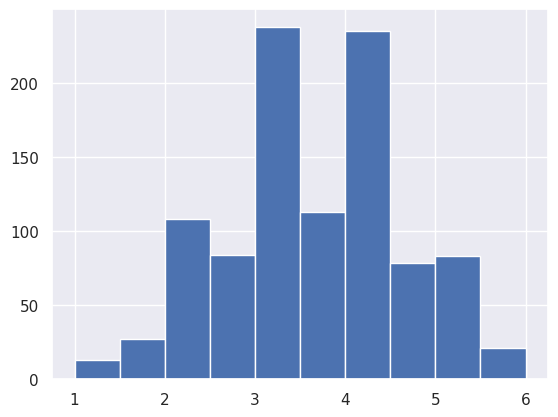

In [ ]:
# N=3
function_central_theory(3)

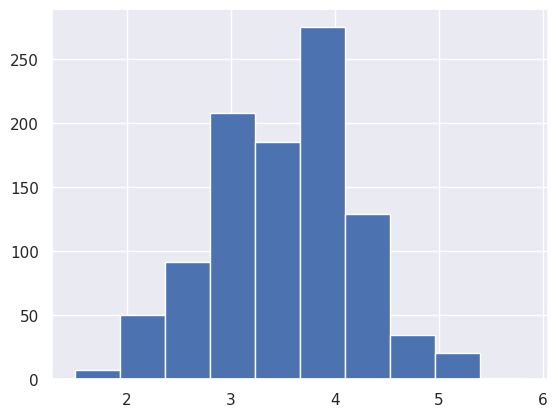

In [ ]:
# N=6
function_central_theory(6)

As we increase $N$ more and more, we see that it is in the form of a normal distribution.

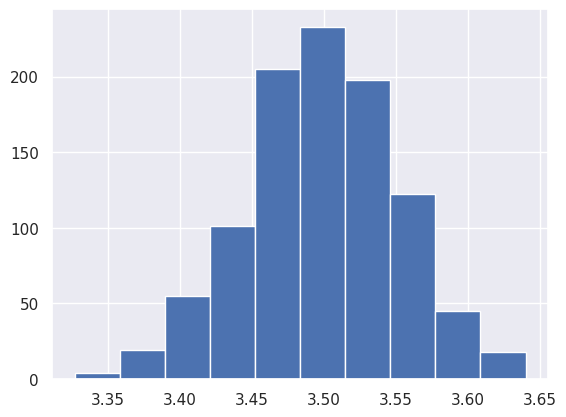

In [ ]:
# N= 10^3
function_central_theory(10**3)

### 4-2.10.3 Sample Distribution

Next, let's learn about typical sample distributions.

##### Chi-square distribution

The first is the **chi-Square distribution**. The $m$ random variables $Z_1, . Z_m$ are distributed independently of each other and each $Z_i$ follows a standard normal distribution (normal distribution with mean 0 and variance 1)
(mean 0, variance 1). At this time, the sum of squares of the following random variables

\begin{eqnarray}
W = \sum^m_{i=1}Z^{2}_{i}
\end{eqnarray}

says that it follows a chi-square distribution with m degrees of freedom. The following is a histogram of random numbers that follow that distribution. Note that zip is the function introduced in Chapter 1, but it is used to create an array of tuples from multiple arrays. Here, we create an array of tuples [(2, “b”), (10, “g”), (60, “r”)] from the arrays [2, 10, 60] and [“b”, “g”, “r”].

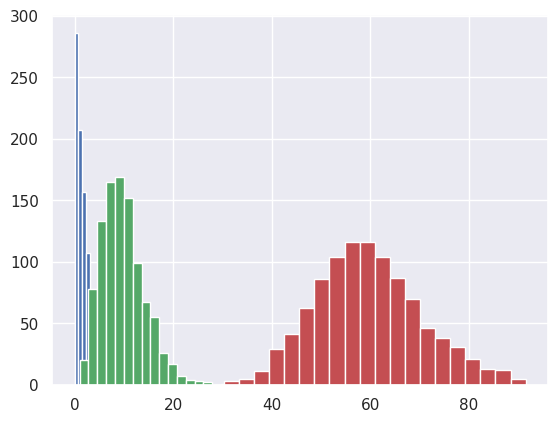

In [ ]:
# chi-square distribution
# Histogram of random numbers generated by a chi-square distribution following degrees of freedom 2, 10, 60
for df, c in zip([2, 10, 60], 'bgr'):
    x = np.random.chisquare(df, 1000)
    plt.hist(x, 20, color=c)

#### Student's t-distribution
The following is the Student's **t distribution**. When $Z$ and $W$ are independent random variables and follow a standard normal distribution and a chi-square distribution with m degrees of freedom, respectively,

\begin{eqnarray}
T = \frac{Z}{\sqrt{\frac{W}{m}}}
\end{eqnarray}

Then $T$ is said to follow a Student's t-distribution with $m$ degrees of freedom. Below is a sample diagram of the t-distribution.

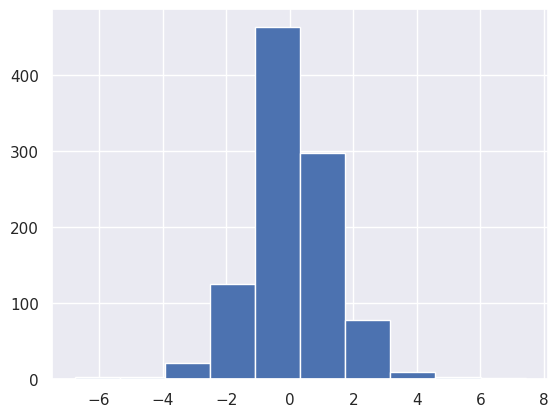

In [ ]:
# t-disrtibution
x = np.random.standard_t(5, 1000)
plt.hist(x)
plt.grid(True)

#### F-distribution
Finally, we also introduce the **F distribution**. Assume that $W_1$ and $W_2$ are independent random variables, following a chi-square distribution with $m_1, m_2$ degrees of freedom, respectively,

\begin{eqnarray}
F = \frac{\frac{W_1}{m_2}}{\frac{W_2}{m_2}}
\end{eqnarray}

Then $F$ is said to follow a Snedeker's F distribution with $(m_1, m_2)$ degrees of freedom. Below is a sample diagram of the F distribution.

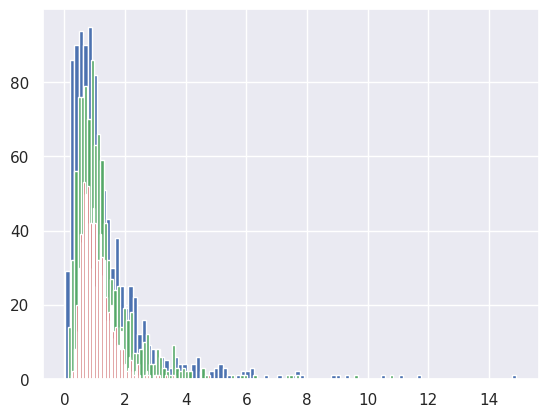

In [ ]:
# F-distribution
for df, c in zip([ (6, 7), (10, 10), (20, 25)], 'bgr'):
    x = np.random.f(df[0], df[1], 1000)
    plt.hist(x, 100, color=c)

This concludes our introduction to typical distributions. There are many other distributions, and we will examine them each time the need arises.

#### <Practice Question 4-2-14>

Generate 1000 random numbers each from a chi-square distribution with 5, 25, and 50 degrees of freedom and write a histogram.

#### <Practice Question 4-2-15>

Generate 1000 random numbers from a t-distribution with 100 degrees of freedom and write a histogram.

#### <Practice Question 4-2-16>

Generate 1000 random numbers each from an F distribution with degrees of freedom (10, 30) and (20, 25) and write a histogram.

***

## 4-2.11 Statistical Estimation

Keywords: estimator, point estimate, unbiasedness, unbiased estimator, agreement, interval estimation, confidence interval, confidence coefficient, maximum likelihood method, likelihood, likelihood function, Bayesian method

Here we will learn about **estimation**.

### 4-2.11.1 Estimators and Point Estimation
When estimating the probability distribution, mean, or variance of a population, we extract a sample from the population and estimate it using the mean or variance of the sample. Here, a random sample of size n {$X_1, . , X_n$}, let us consider how to find (estimate) the population mean $\mu$. First, the sample mean $\overline{X}$ is,

\begin{eqnarray}
\overline{X}=\frac{1}{n}\sum^n_{i=1}X_i
\end{eqnarray}

This is the **estimator**. Generalizing this, it can be written as a function of the random variable as follows, and this equation is called the **estimator**. This is the equation for estimating the number of mothers, such as the population mean or the population variance. To say the number of mothers as a single point parameter value ($\theta$) based on a sample is called **point estimation**.

\begin{eqnarray}
\overline{X}=T(X_1, ..., X_n)
\end{eqnarray}

### 4-2.11.2 Unbiasedness and Consistency

However, it is not just any function, but it is desirable to be able to estimate parameters more accurately. The criteria for this are the properties of **unbiasedness** and **consistency**.

An estimator is said to be **unbiased** when the expected value of the estimator agrees with the population $\theta$, which can be expressed as follows An estimator with this unbiasedness is called an **unbiased estimator**.

\begin{eqnarray}
E[T(X_1, ..., X_n)]=\theta
\end{eqnarray}

Consistency is the property that the estimator $E[T(X_1, ..., X_n)]$ of $\theta$ approaches $\theta$ as the number of observations n increases. X_n)] approaches $\theta$ as the number of observations n increases, and can be expressed as follows for any $\epsilon>0$. In this case, $T(X_1, ... , X_n)$ is called the matching estimator.

\begin{eqnarray}
\displaystyle \lim_{n \to \infty} P[|T(X_1, ..., X_n)- \theta |\ge \epsilon]=0
\end{eqnarray}

### 4-2.11.3 Interval Estimation

In point estimation, the population is obtained at a single point, but interval estimation estimates the population with some interval. First, there is a sample $X_1, ... , X_n$, which are randomly selected from a normal distribution $N$($\mu$,1) with mean $\mu$ and variance 1. Consider the case where the population mean $\mu$ is estimated from this sample. In this case, the sample mean $\overline{X}$ follows a normal distribution $N(\mu,\frac{1}{n})$ with mean $\mu$ and variance $\frac{1}{n}$, so the following holds with $Z_{\alpha /2}$ on both sides of the normal distribution.

\begin{eqnarray}
P(-z_{\alpha /2} \le \sqrt{\mathstrut n} (\overline{X} - \mu ) \le z_{\alpha /2} )=1-\alpha
\end{eqnarray}

Rewriting this equation, it will be equation below

\begin{eqnarray}
P(\overline{X} - \frac{z_{\alpha /2}}{\sqrt{n}} \le \mu \le \overline{X} + \frac{z_{\alpha /2}}{\sqrt{n}})=1-\alpha
\end{eqnarray}

and the interval $[\overline{X} - \frac{z_{\alpha /2}}{\sqrt{n}} , \overline{X} + \frac{z_{\alpha /2}}{\sqrt{n}}]$ can be written as an interval for estimating $\mu$. The interval $[\overline{X} - \frac{z_{\alpha /2}}{\sqrt{n}} , \overline{X} + \frac{z_{\alpha /2}}{\sqrt{n}}]$ is called the **confidence interval**. The probability that the confidence interval contains the population (in this case, the population mean) that we want to estimate is called the **confidence coefficient** and can be expressed as $1-\alpha$. The general definition of a confidence interval is as follows.

Let $X_1, ... , X_n$ as a random sample from the population distribution $f(x;\theta)$, where $\theta$ is the one-dimensional population. ${\bf X}=(X_1, ... , X_n)$, then the interval $[L({\bf X}), U({\bf X})]$ is called the **confidence interval** of the **confidence coefficient**$1-\alpha$ when the two statistics $L({\bf X}), U({\bf X})$ satisfy the following for all $\theta$.

\begin{eqnarray}
P(L({\bf X})\le \theta \le U({\bf X})) \ge 1-\alpha
\end{eqnarray}

### 4-2.11.4 Finding an Estimated Quantity

There are several methods for obtaining estimators. In this section, the maximum likelihood and Bayesian methods will be briefly explained (there are also other methods such as the method of moments, etc., which you should look into). It will be a bit applied, so you can skip over it.

#### Likelihood function

When we studied simultaneous probability functions, given a population, we determined the probability that an observed value would occur. Conversely, given an observed value, the **likelihood function** considers the probability function to be a function of the population. The maximum likelihood method is a method that takes the population that maximizes the likelihood function as the estimate of the population.

Suppose now that we are given a probability function $f(x;\theta)$. The $x$ is a variable and $\theta$ means a constant.

A random sample from the population $X_1, ... , X_n$ and take ${\bf X}=(X_1, ... , X_n)$. The realization of this ${\bf X}$ in ${\bf x}=(x_1, ... , x_n)$ of this ${\bf X}$ is considered as a function of $\theta$ and the likelihood function is defined as follows.

\begin{eqnarray}
L(\theta;{\bf x})=f(x_1;\theta) \cdot...\cdot f(x_n;\theta)
\end{eqnarray}

Since the likelihood function is in the form of a product and is easier to compute if it is converted to a sum by logarithmic transformation, it is converted to **log likelihood function** as follows.

\begin{eqnarray}
\log L(\theta;{\bf x})=\sum^n_{i=1} \log f(x_i;\theta)
\end{eqnarray}

To find the above maximum, differentiate and find the solution $\theta$ that is zero. The following equation is called the **likelihood equation** and this solution $\theta$ is called the **maximum likelihood estimator**. This is how the maximum likelihood estimation method is used to find the estimate.

\begin{eqnarray}
\frac{d}{d\theta}{\log L(\theta,{\bf x})}= 0
\end{eqnarray}

#### Bayesian method

Until now, we had no information on the population $\theta$ and used a frequency-theoretic approach to estimate it, but now we assume a prior distribution for this $\theta$ and use Bayes' theorem to update it to the posterior distribution, which is called the Bayesian method.

Assuming that the likelihood function obtained from the sample is $p(x|\theta)$ and that the population $\theta$ follows a prior probability $\pi(\theta)$, the posterior distribution can be obtained by Bayes' theorem as follows.

\begin{eqnarray}
\pi(\theta|x) = \frac{p(x|\theta)\pi(\theta)}{\int p(x|\theta)\pi(\theta) d\theta}
\end{eqnarray}

#### <Practice Question 4-2-17>
The sample mean made from a sample of size n from a normal population with mean $\mu$ and variance $\sigma^2$ should be the mother mean and show this unbiasedness (hand calculation is fine).

#### <Practice Question 4-2-18>
Suppose a certain coin is tossed 5 times and it comes up face down, face up, face down, face up, and so on. Estimate the probability that this coin will turn up face up as $\theta$ (you can do this by hand).

#### <Pratice Question 4-2-19>
Assuming that the population follows the following exponential distribution, from which we obtain a sample of size n ${X_1, X_2, . X_n}$, estimate the maximum likelihood of the population ${\lambda}$ (you can do this by hand).

\begin{eqnarray}
f(x|\lambda) = \lambda \mathrm{e}^{-\lambda x}
\end{eqnarray}

***

## 4-2.12 Statistical Tests
Keywords: null hypothesis, alternative hypothesis, significance, rejection, significance level, type 1 error, type 2 error, power

Now that we have had a long explanation of the formulas, let us return again to the “student data” that we dealt with in the first part of this chapter. As we did in the exercises, we will first calculate the average of the grades in math and Portuguese. We get the following

Here, the math grade data (student-mat.csv) and the Portuguese grade data (student-por.csv) are read and merged together. item, and “`suffixes`” is the suffix tail to be added to the end of the column after the merge.

In [ ]:
# Load mathematical data
student_data_math = pd.read_csv('student-mat.csv', sep=';')

# Load portugese data
student_data_por = pd.read_csv('student-por.csv', sep=';')

# Join
student_data_merge = pd.merge(student_data_math
                              , student_data_por
                              , on=['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu'
                                      , 'Fedu', 'Mjob', 'Fjob', 'reason', 'nursery', 'internet']
                              , suffixes=('_math', '_por'))

print('G1 math grade point average：', student_data_merge.G1_math.mean())
print('G1 Portuguese grade point average：', student_data_merge.G1_por.mean())

G1 math grade point average： 10.861256544502618
G1 Portuguese grade point average： 12.112565445026178


### 4-2.12.1 Tests
Looking at the numbers, it appears that the math is worse, albeit slightly. However, can we really say that this is a real difference?　The approach of testing is to consider this. As a hypothesis, let us assume that there is no difference in the mean of grades in the population. Let $\mu_{math}$ be the population mean of math grades and $\mu_{por}$ be the population mean of Portuguese grades, then the following equation holds

\begin{eqnarray}
\mu_{math} = \mu_{por}
\end{eqnarray}


In testing, the hypothesis to be considered correct is called the **null hypothesis**, $H_{0}$. On the other hand, the rejection of the null hypothesis is the hypothesis that there is a difference between the two. This means that the following equation holds

\begin{eqnarray}
\mu_{math} \neq \mu_{por}
\end{eqnarray}

This is called the **opposition hypothesis** and is denoted $H_{1}$. Next, suppose we assume that $H_{0}$ is correct from earlier, and we take a statistical approach and say that it cannot happen (e.g., $\mu_{math} = \mu_{por}$ has less than a 5% chance of happening). At this point, we can say that this $H_{0}$ is **rejected**, that the alternative hypothesis is adopted, and that therefore there is a difference.


In addition, the level at which the null hypothesis is rejected in the test is called the **significance level**, and we set it at 5%. Also, a statistical difference (**significant**) is defined as a difference that is less than the significance level. The significance level is expressed as **α**, and α=5% or α=1% is often used.

Also, **p-value** (**p-value**) is the probability that, by chance, a number that is actually contrary is calculated as a statistic. If $H_{0}$ is correct, the lower the p-value, the more improbable it is that something happened (the statistic that $H_{0}$ is incorrect was computed).

Now let's use these concepts to calculate the p-value. To calculate the p-value, use `stats.ttest_rel`.

In [ ]:
from scipy import stats
t, p = stats.ttest_rel(student_data_merge.G1_math, student_data_merge.G1_por)
print( 'p-value = ', p)

p-value =  1.6536555217101022e-16


If we set the significance level at 1%, we can reject the null hypothesis and conclude that there is a difference.

### 4-2.12.2 Type 1 and Type 2 errors

Here, the null hypothesis was rejected at the 1% significance level, but it is possible that the null hypothesis was correct. This rejection of the null hypothesis even though it is correct is called **Type 1 error**, the probability of which is usually denoted by **$α$**. On the other hand, accepting the null hypothesis even though it is incorrect is called a **Type 2 error**, the probability of which is denoted by **$β$**.

The complement of $β$, $1-β$, is called **power** and represents the probability that the null hypothesis can be correctly rejected when it is false. Using a court analogy, a criminal who is actually guilty being found not guilty is a type 1 error, while a person who is actually innocent being found guilty is a type 2 error. The following diagram is helpful.

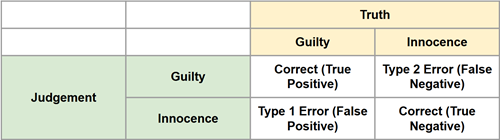

It is generally said that $1-β$ should be about 0.8. However, $α$ and $β$ are related in that when one is made smaller, the other becomes larger. Also, $β$ is an important quantity, but since sample size and effect size are required to calculate its value, we will only introduce the concept here.


### 4-2.12.3 Cautions for Tests for Big Data
Although tests are used in a variety of fields, there is a caveat. In fact, tests are not suited for the analysis of big data (there is no specific, strict definition, but we assume that the sample size is millions or tens of millions or more). First of all, it is almost impossible in the real world for sample and population statistics to be exactly equal to each other.

As the sample size is increased, the power $1-β$ increases accordingly, and even subtle differences, which in practice should be considered equal, will result in small p-values and rejection of the null hypothesis. In other words, testing for big data usually results in highly significant (p-value is quite small) results.

Even if the test is highly significant, it does not conclude that the two populations are significantly different; the test does not tell us how much the two values differ. If we want to know how much they differ, it is effective to use the confidence intervals used in the previous section.

This concludes the unit up to the test. If you have not had the opportunity to learn about statistics and probability before, please take a look at the references I have mentioned in the introduction and study them all through. Also, there are various options for the functions in the libraries we have covered so far, so if you are interested, please check them out.

#### <Practice Question 4-2-20>

With the data used in the first part, can you say that there is a difference for the respective averages of G2 in math and Portuguese grades? And what about `G3`?

***

## 4-2.13 Comprehensive Question

### Compresive Question 4-2-3 Test

Using the data (`student_data_merge`) used in <4-2.12 Statistical Tests>, answer the following questions.

(1) Can we say that there is a difference in the number of absences (`absences`) for each?


(2) What about the respective study time (`studytime`)?



---



**Acknowledgements**: For use of the following two datasets
1. https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip
2. http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

**References**: Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [[http://archive.ics.uci.edu/ml](http://archive.ics.uci.edu/ml)]. Irvine, CA: University of California, School of Information and Computer Science.

- Note on citation of dataset in 1:   
P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp.5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7.
[http://www3.dsi.uminho.pt/pcortez/student.pdf](http://www3.dsi.uminho.pt/pcortez/student.pdf)  

- Note on citation of dataset in 2:   
P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.
Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

- A-5:  
[Introduction to Statistics (Basic Statistics I)]Toukeigaku nyumon(Kiso Toukeigaku I)(in Japanese).(published by University of Tokyo Publishing, ISBN:978-4130420655)  

  [Statistics]Toukeigaku(in Japanese).(published by University of Tokyo Publishing, ISBN:978-4130629218)  

  [Statistics]Toukeigaku(in Japanese).(published by Yuhikaku)  


- A-9:  
[Fundamental Calculus for Engineers: Mastering the Mathematics Essential for Machine Learning
]Gijutusya no tameno kiso kaisekigaku: Kikai gakusyu ni hitsuyou na sugaku wo honkide manabu(in Japanese).(Shoeisha, ISBN:978-4798155357)  

  [Linear Algebra for Engineers: Mastering the Fundamentals of University-Level Mathematics]Gijutusya no tameno senkei daisugaku: Daigaku no kiso sugaku wo honkide manabu(in Japanese).(Shoeisha, ISBN:978-4798155364)  

  [Probability and Statistics for Engineers: Mastering the Fundamentals of University-Level Mathematics]Gijutusya no tameno kakuritsu tokei: Daigaku no kiso sugaku wo honkide manabu(in Japanese).(Shoeisha, ISBN:978-4798155364)  


- B-10:  
[Time for Statistics]Tokeigaku no jikan(in japanese)https://bellcurve.jp/statistics/course/#step1%22  